In [1]:
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras import utils
import numpy as np
from sklearn import metrics

Entering the path of the folder where the images are residing and getting train and test data from the folders

In [3]:
PATH = 'F:/Kaggle/Fashion product images small/data'

In [4]:
train_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, 'test')

In [5]:
train_accessories_dir = os.path.join(train_dir, 'Accessories') 
train_apparel_dir = os.path.join(train_dir, 'Apparel') 
train_footwear_dir = os.path.join(train_dir, 'Footwear') 
train_personalcare_dir = os.path.join(train_dir, 'Personal Care') 
test_accessories_dir = os.path.join(test_dir, 'Accessories') 
test_apparel_dir = os.path.join(test_dir, 'Apparel') 
test_footwear_dir = os.path.join(test_dir, 'Footwear') 
test_personalcare_dir = os.path.join(test_dir, 'Personal Care') 

In [6]:
num_accessories_tr = len(os.listdir(train_accessories_dir))
num_apparel_tr = len(os.listdir(train_apparel_dir))
num_footwear_tr = len(os.listdir(train_footwear_dir))
num_personalcare_tr = len(os.listdir(train_personalcare_dir))

num_accessories_ts = len(os.listdir(test_accessories_dir))
num_apparel_ts = len(os.listdir(test_apparel_dir))
num_footwear_ts = len(os.listdir(test_footwear_dir))
num_personalcare_ts = len(os.listdir(test_personalcare_dir))

total_train = num_accessories_tr+num_apparel_tr+num_footwear_tr+num_personalcare_tr
total_val = num_accessories_ts+num_apparel_ts+num_footwear_ts+num_personalcare_ts

In [7]:
print('total training accessories images:', num_accessories_tr)
print('total training apparel images:', num_apparel_tr)
print('total training footwear images:', num_footwear_tr)
print('total training personal care images:', num_personalcare_tr)

print('total test accessories images:', num_accessories_ts)
print('total test apparel images:', num_apparel_ts)
print('total test footwear images:', num_footwear_ts)
print('total test personal care images:', num_personalcare_ts)
print("--")
print("Total training images:", total_train)
print("Total test images:", total_val)

total training accessories images: 9031
total training apparel images: 17116
total training footwear images: 7378
total training personal care images: 1923
total test accessories images: 2258
total test apparel images: 4279
total test footwear images: 1844
total test personal care images: 481
--
Total training images: 35448
Total test images: 8862


The Image data generator is used with rescale = 1/255, which is done to normalize the data to have values between 0 and 1

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [9]:
batch_size = 32 # Hyperparameter
epochs = 5 # Hyperparameter
IMG_HEIGHT = 80
IMG_WIDTH = 60

flow_from_directory method is used to get the training and the test data from the respective folders in the form of a tuple (x,y) where x is the data/images and y is the corresponding label. Please Note that both x and y are numpy arrays.

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           color_mode = 'rgb',
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='sparse')

Found 35448 images belonging to 4 classes.


In [11]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='sparse')

Found 8862 images belonging to 4 classes.


In [12]:
sample_training_images, _ = next(train_data_gen)

In [16]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

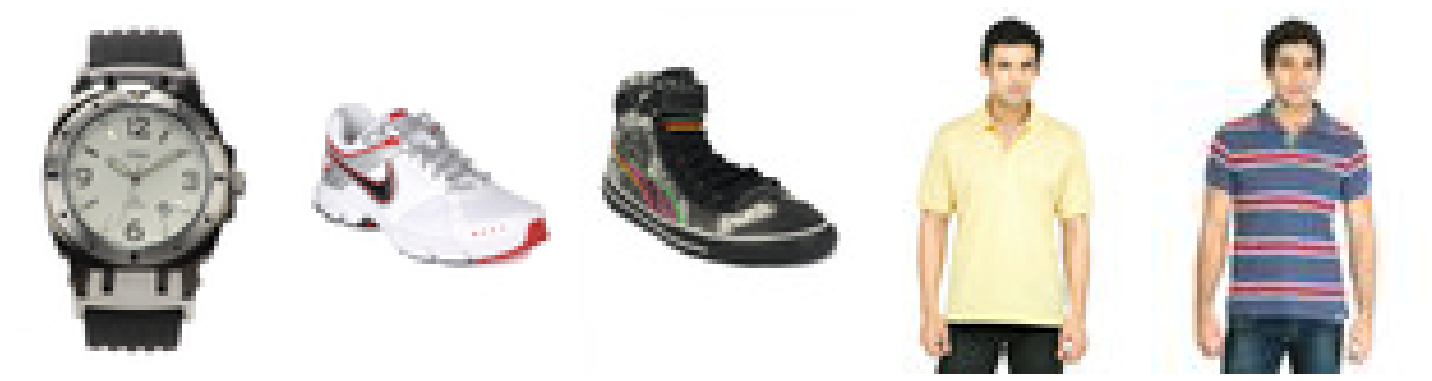

In [17]:
plotImages(sample_training_images[:5])

## CNN Using Sequential API

A sequential model is defined with two 2D convolution + max pooling layers followed by flattening and forming a fully connected network with dropout of 0.2. The activation function used for the output is 'softmax' as we are dealing with a multi class problem

In [18]:
model_seq = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [19]:
model_seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 58, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 29, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 11, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 11264)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                7

In [20]:
model_seq.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history = model_seq.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=test_data_gen
)

Train for 1108 steps, validate for 277 steps
Epoch 1/5
1108/1108 [==============================] - 387s 349ms/step - loss: 0.2168 - accuracy: 0.9276 - val_loss: 0.1074 - val_accuracy: 0.9676
Epoch 2/5
1108/1108 [==============================] - 261s 235ms/step - loss: 0.0959 - accuracy: 0.9691 - val_loss: 0.0717 - val_accuracy: 0.9774
Epoch 3/5
1108/1108 [==============================] - 259s 234ms/step - loss: 0.0685 - accuracy: 0.9782 - val_loss: 0.0614 - val_accuracy: 0.9826
Epoch 4/5
1108/1108 [==============================] - 260s 235ms/step - loss: 0.0473 - accuracy: 0.9847 - val_loss: 0.0611 - val_accuracy: 0.9839
Epoch 5/5
1108/1108 [==============================] - 260s 235ms/step - loss: 0.0394 - accuracy: 0.9871 - val_loss: 0.0557 - val_accuracy: 0.9850


In [22]:
def plot_history(key):
    plt.figure(figsize=(16,10))
    val = plt.plot(history.epoch, history.history['val_'+key], '--', label='validation_' + key)
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),label= 'training_' + key)
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel(key)
    plt.xlim([0,max(history.epoch)])

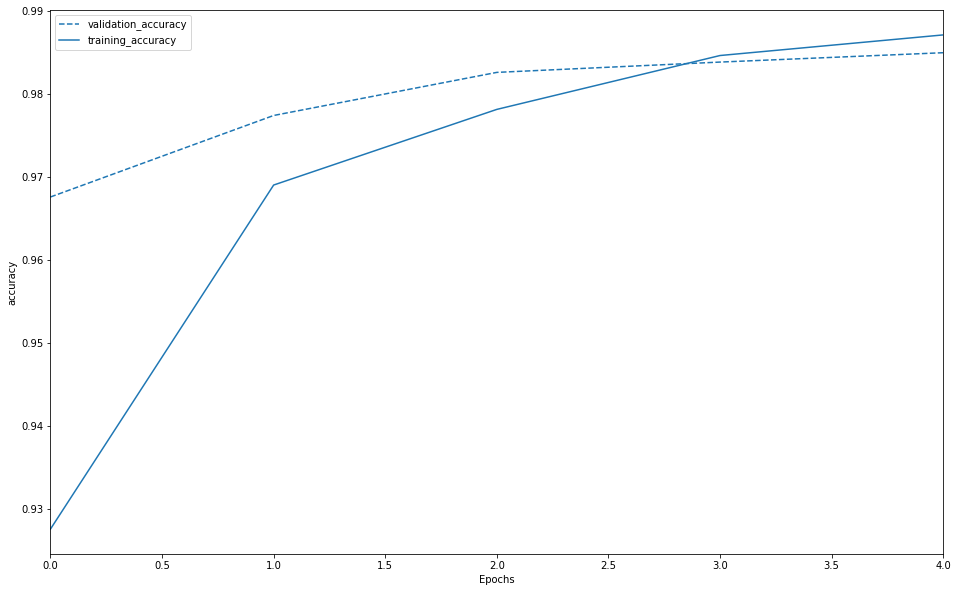

In [23]:
plot_history('accuracy')

In [24]:
y_pred = model_seq.predict_generator(test_data_gen, steps=total_val // batch_size+1)
print( "Test Accuracy = ", metrics.accuracy_score(test_data_gen.classes,y_pred.argmax(axis = 1)))

Test Accuracy =  0.9849921011058452


In [36]:
y_pred = model_seq.predict_generator(test_data_gen, steps=total_val // batch_size+1)
print('Confusion Matrix')
print(metrics.confusion_matrix(test_data_gen.classes, y_pred.argmax(axis=1)))
#print('Classification Report')
#target_names = ['Acessories', 'Apparel', 'Fashion','Personal care']
#print(metrics.classification_report(test_data_gen.classes, y_pred.argmax(axis=1), target_names=target_names))

Confusion Matrix
[[2200   43    3   12]
 [  36 4233    0   10]
 [  19    2 1823    0]
 [   5    3    0  473]]


## CNN Using Functional API

Input layer :

In [13]:
input_1 = layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH ,3))

Forming the first branch :

In [14]:
conv2d = layers.Conv2D(32, kernel_size=4, activation='relu')(input_1)
max_pooling2d = layers.MaxPooling2D(pool_size=(2, 2))(conv2d)
flatten = layers.Flatten()(max_pooling2d)
dense = layers.Dense(64, activation='relu')(flatten)

Forming the second branch :

In [15]:
flatten_1 = layers.Flatten()(input_1)
dense_1 = layers.Dense(64, activation='relu')(flatten_1)
dropout = layers.Dropout(0.2)(dense_1)
dropout_1 = layers.Dropout(0.2)(dropout)

Merging the two branches and defining the output (dense layer):

In [16]:
# merge the two branches
merge = layers.concatenate([dense, dropout_1])
#Output
dense_3 = layers.Dense(10, activation='softmax')(merge)
model_func = models.Model(inputs=input_1, outputs=dense_3)

In [17]:
model_func.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80, 60, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 77, 57, 32)   1568        input_1[0][0]                    
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 14400)        0           input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 38, 28, 32)   0           conv2d[0][0]                     
______________________________________________________________________________________________

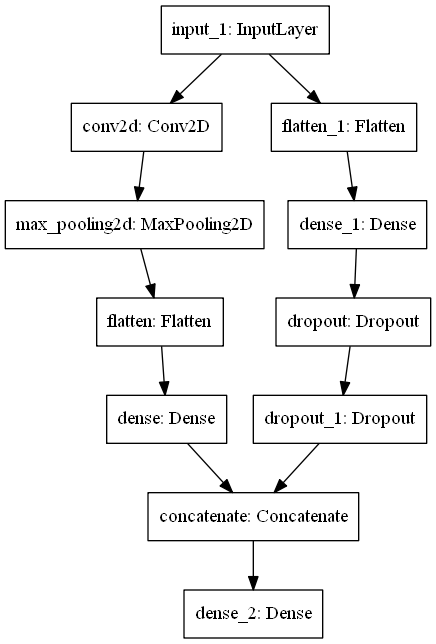

In [18]:
utils.plot_model(model_func, "functional_api_model.png", show_shapes=False)

In [19]:
model_func.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history = model_func.fit(
    train_data_gen,
    epochs=10,
    validation_data=test_data_gen
)

Train for 1108 steps, validate for 277 steps
Epoch 1/10
1108/1108 [==============================] - 164s 148ms/step - loss: 0.2508 - accuracy: 0.9315 - val_loss: 0.1364 - val_accuracy: 0.9534
Epoch 2/10
1108/1108 [==============================] - 157s 142ms/step - loss: 0.1155 - accuracy: 0.9628 - val_loss: 0.1246 - val_accuracy: 0.9628
Epoch 3/10
1108/1108 [==============================] - 159s 144ms/step - loss: 0.0746 - accuracy: 0.9756 - val_loss: 0.0890 - val_accuracy: 0.9728
Epoch 4/10
1108/1108 [==============================] - 156s 141ms/step - loss: 0.0528 - accuracy: 0.9838 - val_loss: 0.0854 - val_accuracy: 0.9774
Epoch 5/10
1108/1108 [==============================] - 155s 140ms/step - loss: 0.0419 - accuracy: 0.9874 - val_loss: 0.0920 - val_accuracy: 0.9735
Epoch 6/10
1108/1108 [==============================] - 154s 139ms/step - loss: 0.0306 - accuracy: 0.9906 - val_loss: 0.0936 - val_accuracy: 0.9805
Epoch 7/10
1108/1108 [==============================] - 156s 141ms/

In [21]:
def plot_history(key):
    plt.figure(figsize=(16,10))
    val = plt.plot(history.epoch, history.history['val_'+key], '--', label='validation_' + key)
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),label= 'training_' + key)
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel(key)
    plt.xlim([0,max(history.epoch)])

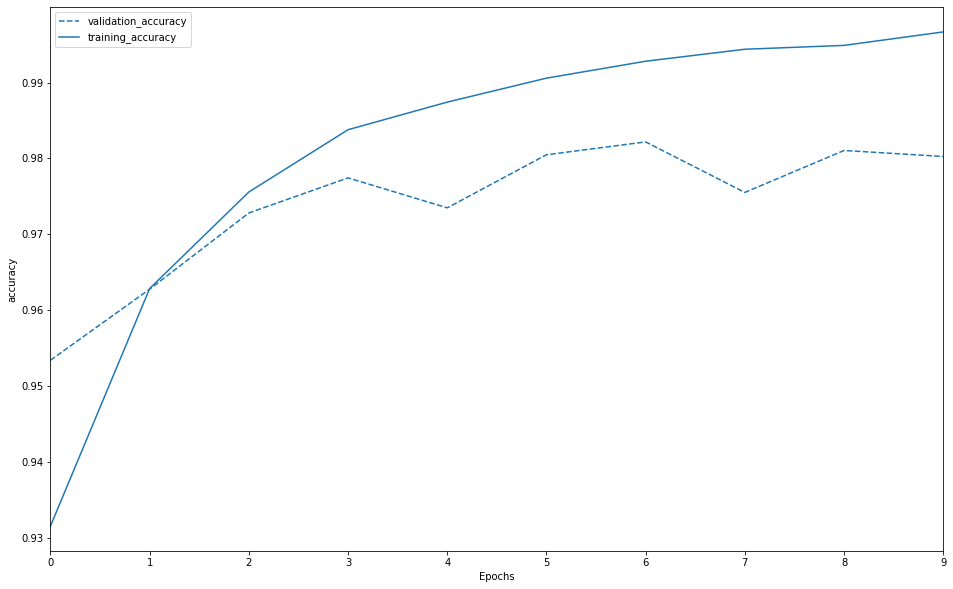

In [22]:
plot_history('accuracy')

In [23]:
y_pred = model_func.predict_generator(test_data_gen, steps=total_val // batch_size+1)
print( "Test Accuracy = ", metrics.accuracy_score(test_data_gen.classes,y_pred.argmax(axis = 1)))

Test Accuracy =  0.9802527646129542
